# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']
mean_male_height = male_df.Height.mean()
mean_male_height = male_df.Height.std()


# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

Text(0, 0.5, 'probability')

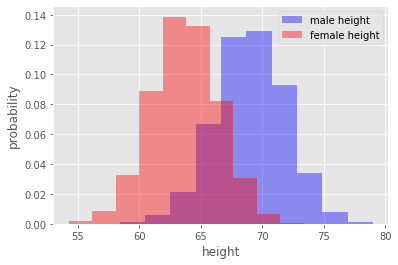

In [15]:
# Your code here
plt.figure()
plt.hist(male_df.Height, density = True, color = 'blue', alpha=0.4, label ='male height', bins=10)
plt.hist(female_df.Height, density = True, color = 'red', alpha=0.4, label ='female height',bins=10)
plt.legend()
plt.xlabel('height')
plt.ylabel('probability')

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

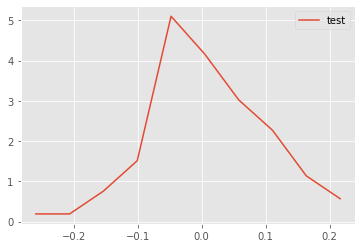

In [27]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy
    
    

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

Text(0, 0.5, 'probability')

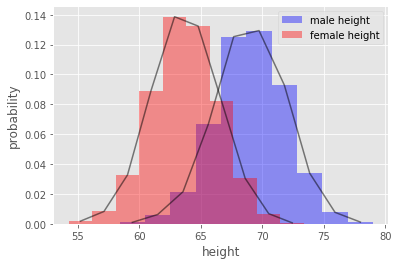

In [31]:
# Your code here 
plt.figure()
plt.hist(male_df.Height, density = True, color = 'blue', alpha=0.4, label ='male height', bins=10)
plt.hist(female_df.Height, density = True, color = 'red', alpha=0.4, label ='female height',bins=10)

pdfx_male_hight, pdfy_male_hight = density(male_df.Height)
plt.plot(pdfx_male_hight, pdfy_male_hight, color = 'black', alpha = 0.5)
pdfx_female_hight, pdfy_female_hight = density(female_df.Height)
plt.plot(pdfx_female_hight, pdfy_female_hight, color = 'black', alpha = 0.5)

plt.legend()
plt.xlabel('height')
plt.ylabel('probability')

## Repeat the above exercise for male and female weights

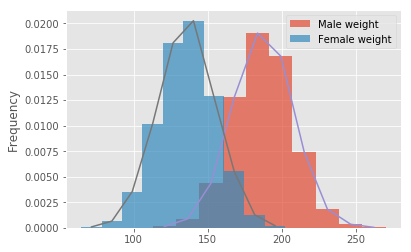

In [21]:
# Your code here 

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

In [32]:
# Code for heights here
import seaborn as sns
plt.figure()
sns.distplot(male_df.Height,
            hist = True, hist_kws = {'linewidth':2, 'edgecolor':'red', 'alpha':0.4, 'color':'w', 'label': 'histogram'},
            kde = True, kde_kws = {'linewidth': 3})













TypeError: distplot() missing 1 required positional argument: 'a'

<Figure size 432x288 with 0 Axes>

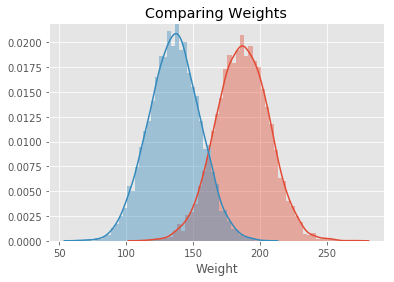

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.